## What are decision trees?

Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables.

An example of a decision tree:

<img src="https://databricks.com/wp-content/uploads/2014/09/decision-tree-example.png"></img>

### Terms related to decision trees

* __Root Node__: The first node of the tree that splits data into two or more sub-nodes.
* __Splitting__: It is a process of dividing a node into two or more sub-nodes.
* __Decision Node__: A node, other than root node, that splits data into two or more sub-nodes.
* __Leaf / Terminal Node__: Nodes that do not split data anymore.
* __Branch / Sub-Tree__: A sub section of entire tree.
* __Parent and Child Node__: Parent node is a node that splits data into sub-nodes. Sub-nodes created from a parent node are called child nodes.

<img src="https://clearpredictions.com/Images/Decision_Tree_2.png"></img>

### Advantages of decision trees

* __Easy to Understand__: Decision tree output is very easy to understand even for people from non-analytical background. It does not require any statistical knowledge to read and interpret them. Its graphical representation is very intuitive and users can easily relate their hypothesis.
* __Useful in Data exploration__: Decision tree is one of the fastest way to identify most significant variables and relation between two or more variables. With the help of decision trees, we can create new variables / features that has better power to predict target variable. 
* __Less data cleaning required__: It requires less data cleaning compared to some other modeling techniques. It is not influenced by outliers and missing values to a fair degree.
* __Data type is not a constraint__: It can handle both numerical and categorical variables.

### Disadvantages of decision trees

* __Over fitting__: Over fitting is one of the most practical difficulty for decision tree models. This problem gets solved by setting constraints on model parameters.
* __Not fit for continuous variables__: While working with continuous numerical variables, decision tree looses information when it categorizes variables in different categories.

### How decision trees perform splitting?

Algorithms for constructing decision trees usually work top-down, by choosing a variable at each step that best splits the set of items. Different algorithms use different metrics for measuring "best".

#### Gini impurity

Used by the CART (classification and regression tree) algorithm for classification trees, Gini impurity is a measure of the likelihood of an incorrect classification of a new instance of a random variable, if that new instance were randomly classified according to the distribution of class labels from the data set. The formula for calculating the gini impurity of a data set or feature is:

$$\Large G=\sum_{i=1}^J p(i)\times(1-p(i))$$

Where $p(i)$ is the probability of a certain classification $i$, per the training set.

The best split would be the one that gains the highest gini impurity reduction. Let's look at an example.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [2]:
df = pd.DataFrame({'Day': [1, 2, 3, 4, 5, 6, 7],
                  'Weather': ['Sunny', 'Rainy', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy'],
                  'Just ate': ['yes', 'yes', 'no', 'no', 'no', 'yes', 'no'],
                  'Late at work': ['no', 'yes', 'yes', 'no', 'no', 'no', 'yes'],
                  'Will go running?': ['yes', 'no', 'yes', 'no', 'yes', 'yes', 'no']})
df

,Day,Weather,Just ate,Late at work,Will go running?
0,1,Sunny,yes,no,yes
1,2,Rainy,yes,yes,no
2,3,Sunny,no,yes,yes
3,4,Rainy,no,no,no
4,5,Rainy,no,no,yes
5,6,Sunny,yes,no,yes
6,7,Rainy,no,yes,no


* _Classes_: $i\in[run, stay]$
* _Current Gini Impurity_: $p(run)=\frac{4}{7}$, $p(stay)=\frac{3}{7}$
  
  Gini Impurity: $G=\sum_{i=1}^j{p(i)\times(1-p(i))}=p(run)\times(1-p(run))+p(stay)\times(1-p(stay))=0.4898$
  
* _Is it Sunny?_
    - __Yes__: 3x went running, 0x stayed home. 
    
    $p(run)=\frac{3}{3}=1$, $p(stay)=\frac{0}{3}=0$
    
    $G=p(run)\times(1-p(run))+p(stay)\times(1-p(stay))=0$
    
    - __No__:  1x went running, 3x stayed home.
    
    $p(run)=\frac{1}{4}=0.25$, $p(stay)=\frac{3}{4}=0.75$
    
    $G=p(run)\times(1-p(run))+p(stay)\times(1-p(stay))=0.375$
    
  Weighted Gini Impurity: $G_{weighted}=\frac{3}{7}\times0+\frac{4}{7}*0.375=0.21$
  
  Impurity reduction: $0.4898-0.21=0.2798$

* _Late at Work?_
    - __Yes__: 1x went running, 2x stayed home.
    
    $p(run)=\frac{1}{3}$, $p(stay)=\frac{2}{3}$
    
    $G=p(run)\times(1-p(run))+p(stay)\times(1-p(stay))=0.444$
    
    - __No__:  3x went running, 1x stayed home.
    
    $p(run)=\frac{3}{4}$, $p(stay)=\frac{1}{4}$
    
    $G=p(run)\times(1-p(run))+p(stay)\times(1-p(stay))=0.375$
    
  Weighted Gini Impurity: $G_{weighted}=\frac{3}{7}\times0.444+\frac{4}{7}*0.375=0.4043$
  
  Impurity reduction: $0.4898-0.4043=0.0855$
  
Since splitting by asking question _Is it Sunny?_ we reduce gini impurity more than by asking question _Late at Work?_, the splitting at the node should be done asking the former question.

### How to avoid overfitting

Preventing overfitting is pivotal while modeling a decision tree and it can be done by setting various constraints to limit tree size. 

__class__ _DecisionTreeClassifier_(class_weight=None, criterion='gini', __max_depth__=2, __max_features__=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, __min_samples_leaf__=1, __min_samples_split__=2, min_weight_fraction_leaf=0.0, presort=False, random_state=None, splitter='best')

> - __max_depth__ - maximum allowed depth of the tree
> - __max_features__ - defines the number of features to be considered while deciding each split
> - __min_samples_leaf__ - split would not be allowed if leaf ended up with less samples than the minimumu allowed
> - __min_samples_split__ - smallest sample size that would be allowed to be split


In [3]:
data = pd.read_csv('./demo-datasets/social_network_ads.csv')

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
x = data[['Gender', 'Age', 'EstimatedSalary']]

In [6]:
y = data['Purchased']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


### Replacing _Gender_ with dummy values

In [9]:
x = pd.get_dummies(x, columns=['Gender'], drop_first=True)

In [10]:
x.head()

,Age,EstimatedSalary,Gender_Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


### Splitting data into _train_ and _test_ datasets

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

### Creating a decision tree classifier

In [12]:
tree = DecisionTreeClassifier(max_depth=2)

In [13]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Visualizing the tree

In [14]:
import graphviz as gv
from sklearn.tree import export_graphviz

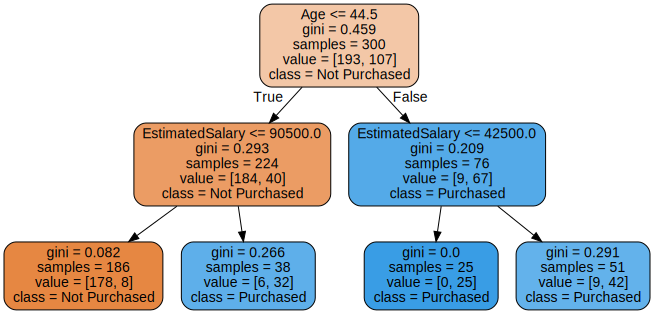

In [15]:
gv.Source(export_graphviz(tree, feature_names=x.columns, filled=True, rounded=True,
                         class_names=['Not Purchased', 'Purchased']))

In [16]:
y_predict = tree.predict(x_test)

### Analyzing the accuracy of the classifier

These are expected values:

In [17]:
print('# of individuals who made a purchase: {0}\n' \
     '# of individuals who did not make a purchase: {1}' \
     .format(y_test.value_counts()[1], y_test.value_counts()[0]))

# of individuals who made a purchase: 36
# of individuals who did not make a purchase: 64


In [18]:
metrics.confusion_matrix(y_test, y_predict)

array([[55,  9],
       [ 1, 35]], dtype=int64)

In [19]:
results = {'Accuracy': metrics.accuracy_score(y_test, y_predict, normalize=True),
          'Precision': metrics.precision_score(y_test, y_predict, average=None),
          'Recall': metrics.recall_score(y_test, y_predict, average=None)}
results

{'Accuracy': 0.9,
 'Precision': array([0.98214286, 0.79545455]),
 'Recall': array([0.859375  , 0.97222222])}

### Feature Importance
Let's see which features are the most important.

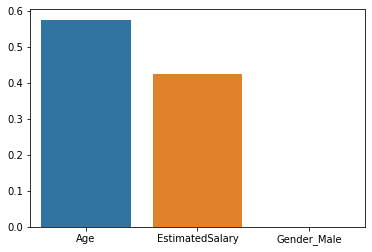

In [20]:
importance = pd.Series(data=tree.feature_importances_, index=x.columns)
sns.barplot(x.columns, importance)